<a href="https://colab.research.google.com/github/kareemullah123456789/AIF/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ---------------------------------------------
# STEP 0: Imports and basic setup
# ---------------------------------------------
# Colab usually has these preinstalled.
# If you get import errors, you can pip install in Colab as needed.

import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Deep learning (Keras via TensorFlow)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ls /content/drive/MyDrive/AIF/2_CarPricesData.pkl

 1_Churn_Modelling.csv             'Gradient Descent Types.docx'
 2_CarPricesData.pkl               'Loss Functions Notes.docx'
'Activation Functions Notes.docx'  'Neural Networks Intro.docx'
 ANN_BinaryClassification.ipynb    'Optimizers Notes.docx'
 ANN_Multiclass_mnist.ipynb        'Weight Initialization Notes.docx'
 ANN_Regression.ipynb


In [6]:

df = pd.read_pickle("/content/drive/MyDrive/AIF/2_CarPricesData.pkl")

In [7]:
# ---------------------------------------------
# STEP 2: Quick peeks and summaries
# ---------------------------------------------
df.head()
#df['MetColor'].unique()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [8]:
# Nulls check
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64


In [9]:
df.groupby("Doors")['Weight'].max()
#df.columns

,Weight
Doors,
2,1115.0
3,1320.0
4,1160.0
5,1320.0


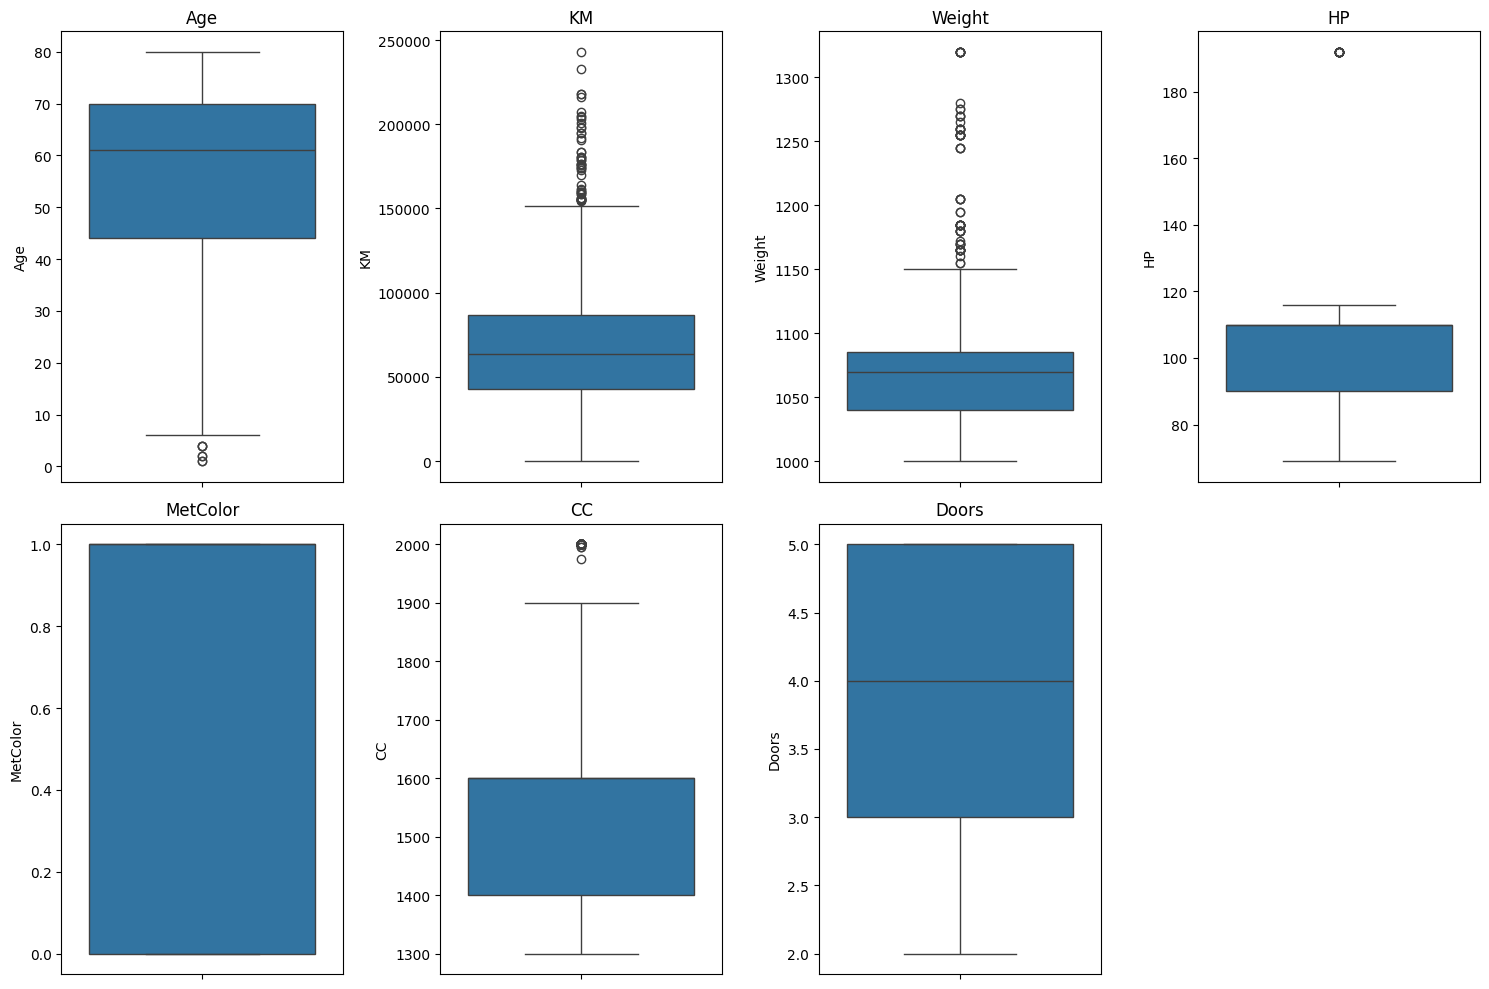

In [10]:
# ---------------------------------------------
# STEP 3: Boxplots of numerical columns
# ---------------------------------------------

# Select numerical columns excluding 'Price'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Price')

# Generate box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


In [11]:
# ---------------------------------------------
# STEP 4: Train Test Split
# ---------------------------------------------
X = df.drop('Price',axis=1)
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, x_test.shape

((1148, 7), (287, 7))

In [13]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_train.dtype

dtype('float32')

In [14]:
# ---------------------------------------------
# STEP 5: Scaling
# ---------------------------------------------
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape[1]

7

In [15]:
# ---------------------------------------------
# STEP 6: Build and train the Keras regression model
# ---------------------------------------------
# - Regression => 1 neuron in the last layer, linear activation (default)
# - Loss: MSE
# - Optimizer: Adam
# - Metric: R2 (available in recent TF versions); we’ll also compute sklearn R^2 after.

model = Sequential()
# Use dynamic input_dim = number of features (safer than hard-coding 7)
# kernel initializer can be tried with one of the other possible values also: 'he_normal','zeros','random.normal'...
# You'll find more of these in official keras documentation

model.add(Dense(units=20, input_dim=x_train.shape[1], kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='he_uniform'))  # linear output

# Try to add R2 metric if available; otherwise, we’ll rely on sklearn later
metrics = []
try:
    metrics = [tf.keras.metrics.R2Score()]
except Exception as e:
    print("R2Score metric not available in this TF build; will compute with sklearn instead.")

model.compile(loss='mean_squared_error', optimizer='adam', metrics=metrics)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_split=0.2  # Add validation split
)

print("Training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 129487360.0000 - r2_score: -9.2091 - val_loss: 117138832.0000 - val_r2_score: -8.8209
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135069008.0000 - r2_score: -8.2250 - val_loss: 117056688.0000 - val_r2_score: -8.8140
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130550576.0000 - r2_score: -8.7282 - val_loss: 116792560.0000 - val_r2_score: -8.7918
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 136498144.0000 - r2_score: -7.8276 - val_loss: 115964232.0000 - val_r2_score: -8.7224
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130042440.0000 - r2_score: -8.8639 - val_loss: 113797704.0000 - val_r2_score: -8.5407
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124213176.0000 - r2_score: -8.6574 - val_loss: 109008272.0000 - val_r2_score: -8.1392
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123710624.0000 - r2_score: -7.5435 - val_loss: 99774072.0000 - val_r2_

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

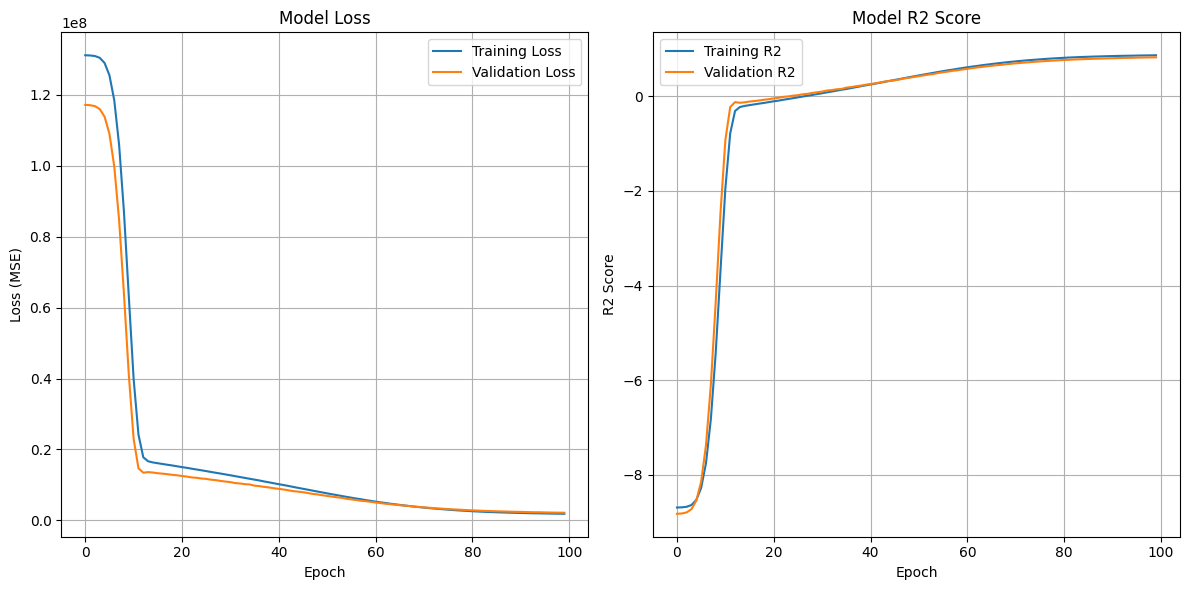

In [16]:
# ---------------------------------------------
# STEP 7: Plot training history (loss and R2)
# ---------------------------------------------
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot R2 score (if available in history)
if 'r2_score' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['r2_score'], label='Training R2')
    plt.plot(history.history['val_r2_score'], label='Validation R2')
    plt.title('Model R2 Score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
else:
    print("R2 Score not available in history to plot.")


plt.tight_layout()
plt.show()



---

## Interpreting the Training Curves

### Loss (MSE)

* Both **training** and **validation** loss start very high and then drop sharply in the first \~10 epochs.
* After the sharp drop, the losses continue to decrease smoothly.
* The training and validation curves stay close together → this shows the model is **not overfitting**.
* By the end of training, the loss values are very small, meaning the predictions are close to the targets.

---

###  R² Score

* At the beginning, R² is **negative** (≈ –9). A negative R² means the model was doing worse than simply predicting the mean.
* Around 10–15 epochs, R² crosses **above 0**. At this point, the model becomes better than the baseline.
* From there, R² steadily increases toward **1.0**.
* An R² close to 1 means the model explains almost all of the variance in the target data.
* Training and validation R² curves overlap →  good **generalization**.

---

###  Key Takeaways

* The model learns very quickly in the first few epochs.
* Both MSE and R² show **consistent improvement** without divergence between training and validation → a strong indicator of a well-fit model.
* The final performance is excellent (low MSE, high R²).
* If needed, you can use **early stopping** since the model stabilizes well before 100 epochs.

---



In [17]:
# ---------------------------------------------
# STEP 8: Evaluate the model
# ---------------------------------------------
eval_results = model.evaluate(x_test, y_test, verbose=0)
print("Keras evaluate() output:", eval_results)

# Also compute R^2 via sklearn for clarity
y_pred = model.predict(x_test).ravel()
print("sklearn R^2:", r2_score(y_test, y_pred))

Keras evaluate() output: [2009523.125, 0.832499623298645]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
sklearn R^2: 0.8324997425079346


In [18]:
mylst = [20, 74000, 1200, 85, 1, 1800, 2]
final_input = sc.transform([mylst])
predicted_price = model.predict(final_input)
print("Predicted Price:", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Price: 16225.418


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
